## Electromyography (EMG)

Materials are based on [Jupyter Notebooks](https://biosignalsplux.com/learn/notebooks.html) by biosignalsplux (see the [LICENSE](https://github.com/biosignalsplux/biosignalsnotebooks/blob/master/LICENSE)).

### Required packages

We will use special package created by biosignalsplux - as it is non-standard, we need to install it now:

In [1]:
# install necessary packages
!pip install biosignalsnotebooks

# install also system libraries necessary for libmagic
!apt-get install libmagic-dev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.1/39.1 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 25.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.3/247.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.9 MB/s eta 0:00:00
  Created wheel for libmagic: filename=libmagic-1.0-py3-none-any.whl size=4270 sha256=e5ee5d95f897760dceb13c1ad35a323508343bf7852262f626ef9a52e4b03d79
  Stored in directory: /root/.cache/pip/wheels/31/ce/d8/099fbd4dbfa5da5596a39eee8a17d2e1bcc29006c07d3563b7
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=e3eaab1dd4c71b5a2a

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  libmagic-dev
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 105 kB of archives.
After this operation, 389 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libmagic-dev amd64 1:5.41-3ubuntu0.1 [105 kB]
Fetched 105 kB in 0s (310 kB/s)
Selecting previously unselected package libmagic-dev:amd64.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../libmagic-dev_1%3a5.41-3ubuntu0.1_amd64.deb ...
Unpacking libmagic-dev:amd64 (1:5.41-3ubuntu0.1) ...
Setting up libmagic-dev:amd64 (1:5.41-3ubuntu0.1) ...
Processing triggers for man-db (2.10.2-1) ...


In [2]:
# necessary imports (as in previous notebook)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import biosignalsnotebooks as bsnb
import bokeh
bokeh.io.output_notebook()
from scipy import signal

/usr/local/lib/python3.10/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Let's load some EMG data!

The notebook uses the sample EMG signals provided by biosignalsplux. But it may be more interesting to load your own signal recorded during the class!

In [3]:
# load sample data
data, header = bsnb.load_signal("emg_bursts", get_header=True)

# load your own signal
# data, header = bsnb.load("my_signal.txt", get_header=True)

In [4]:
# print the data
print(f"Header:\n{str(header)}\nData:\n{str(data)}")

Header:
{'channels': array([3], dtype=int32), 'comments': '', 'date': '2017-1-23', 'device': 'channeller', 'device connection': 'BTH00:07:80:3B:46:61', 'device name': '00:07:80:3B:46:61', 'digital IO': array([0, 1], dtype=int32), 'firmware version': 772, 'resolution': array([16], dtype=int32), 'sampling rate': 1000, 'sync interval': 2, 'time': '10:28:51.69', 'sensor': ['EMG'], 'column labels': {3: 'channel_3'}}
Data:
{'CH3': array([32718, 32784, 32880, ..., 33380, 33448, 33082], dtype=uint16)}


There is only one channel (`'CH3'`) and it contains EMG data (`'sensor': [b'EMG']`).

Let's plot it somehow. As you probably noticed, there is no time vector - we need to create it by hand, using provided `header['sampling rate']`.  
We will create a vector starting from 0. If you want to generate real acquisition time vector, you can use `header['date']` and `header['time']` as a starting point.

In [5]:
raw_emg = data["CH3"]
sr = header["sampling rate"]
emg_len = raw_emg.shape[0]
time = np.linspace(start=0, stop=emg_len/sr, num=emg_len)

**Task 1**: plot the signal in time. Do not forget to label the axes!  
Use `matplotlib` or `bokeh`, whichever you like more.

<function matplotlib.pyplot.show(close=None, block=None)>

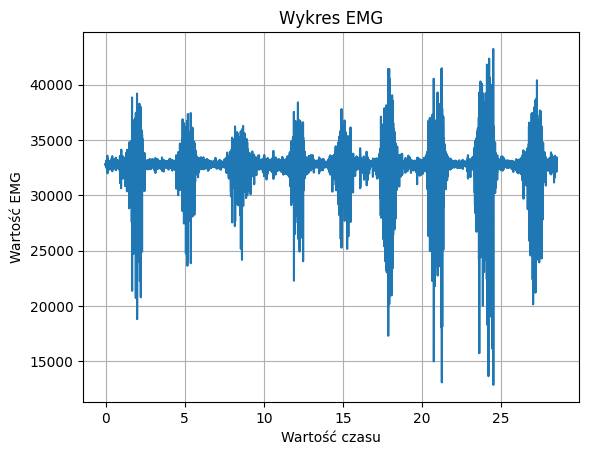

In [9]:
plt.plot(time,raw_emg)
plt.title('Wykres EMG')
plt.xlabel('Wartość czasu')
plt.ylabel('Wartość EMG')
plt.grid(True)
plt.show

**Task 2**: Before the analysis, we need to **convert the units** (as with ECG signal during previous lab):
1. Read the documentation (see [EMG_Datasheet.pdf](https://krzysztof.kutt.pl/didactics/psaw/EMG_Datasheet.pdf)). On the second page, there is a transfer function that converts raw signal from analog-to-digital converter (`ADC`) to real EMG in *mV*.
2. Prepare the proper function for conversion (`convert_to_emg(raw_signal)`) that returns the signal in *mV*.
3. Apply the function to the sample signal and plot the results (using `matplotlib` or `bokeh`)

In [18]:
def convert_to_emg(raw_signal,header):
  # n is already filled by proper value (from the signal header)
  n = header["resolution"][0]
  vcc = 3000 #3V
  g_emg = int((-0.5 + raw_signal // (2 * n)) * vcc // 1000)


  # do the conversion
  return g_emg

In [23]:
# apply the function
converted_emg = convert_to_emg(raw_emg,sr)

plt.plot(time,converted_emg)
plt.title('Wykres EMG')
plt.xlabel('Wartość czasu')
plt.ylabel('Wartość EMG')
plt.grid(True)
plt.show

IndexError: invalid index to scalar variable.

### EMG signal
The EMG electrodes read the electric potential generated in the muscle fibers when they contract. As a result the signal consists of two alternating parts: baseline and muscle activation (see plot below).

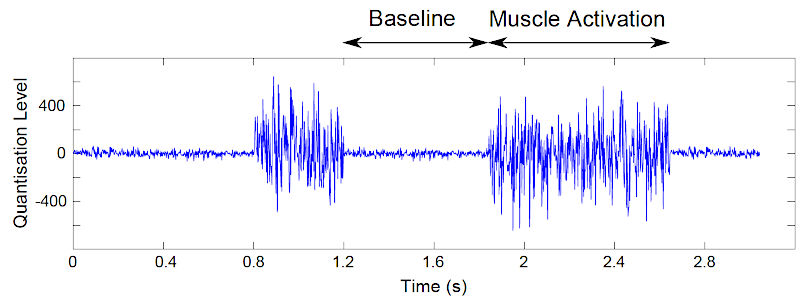

When we exploit the EMG signal in human-computer interaction we typically analyze:
* *RAW signal* - as you can see above, alternating baseline and activation are easy to detect even in the raw signal, so some people don't use any additional preprocessing but just use the signal directly. However, it can be tricky, and besides, it makes it difficult to extract signal features.
* *Filtered EMG* - the signal can be filtered in a variety of ways (see [the review](http://doi.org/10.32474/OAJBEB.2018.01.000104)), potentially the most interesting approach is the one leading to a signal envelope (below).
* *EMG signal envelope* - the signal is very simplified (see figure below), but it contains the most important information, i.e., it differentiates the amplitudes and allows you to extract the onset times, so it is a prerequisite for most EMG post-processing.
* *Pulse onset time* - it is the point at which muscle activation has begun.
* *Onset duration* - length of muscle activation. Along with pulse onset time, it is the most commonly identified EMG feature.
* *Amplitude* - amplitude of muscle activation. In HCI it is used less frequently - usually only baseline/activation is differentiated via onset time and duration.



### EMG signal envelope

The first part of the EMG signal analysis will lead to the preparation of the signal envelope, as shown in the figure below (source: [10.1109/ROBIO.2015.7418935](http://doi.org/10.1109/ROBIO.2015.7418935)). This consists of several steps, which are described in the following cells.

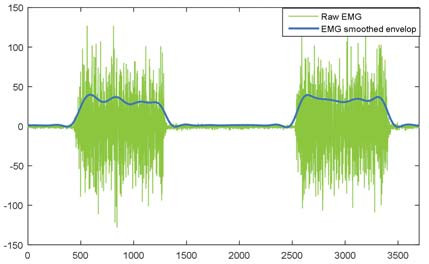

In [24]:
# This is a sumplementary function for plotting the subsequent steps
def plot_emg_series(time, series1, name1, series2, name2, series3=None, name3=None):
  colors = bokeh.palettes.brewer['Paired'][3]
  bf = bokeh.plotting.figure(x_axis_label='Time (s)', y_axis_label='EMG (mV)', width=800, height=250)
  bf.line(time, series1, alpha=0.8, line_width=2, color=colors[0], legend_label=name1)
  bf.line(time, series2, alpha=0.8, line_width=2, color=colors[1], legend_label=name2)
  if series3 is not None:
    bf.line(time, series3, alpha=0.8, line_width=2, color=colors[2], legend_label=name3)
  bf.legend.click_policy="hide"
  bokeh.plotting.show(bf)

**Task 3**: Complete all steps below and create a signal envelope.

In [ ]:
# Step 1: Baseline correction (to ensure that baseline is on 0)
# Simply calculate the average value of the entire converted_emg signal
# and (using this value) alter all the values so that the average becomes 0
# See also scipy.signal.detrend() function (but it is not required here)

corrected_emg = # _FILL_IN_YOUR_CODE_HERE

# plot the result
# note: the difference is usually very small and you have to zoom in to see it
plot_emg_series(time, converted_emg, 'Raw EMG', corrected_emg, 'After baseline correction')

In [ ]:
# Step 2: Filtering - band pass filter (try 20-200 Hz)

filtered_emg = # _FILL_IN_YOUR_CODE_HERE

# plot the result
plot_emg_series(time, corrected_emg, 'After baseline correction', filtered_emg, 'Filtered EMG (band pass)')

Step 3: to provide more precise envelope, we will use the Teager-Kaiser energy operator:
\begin{equation}
    EMG_{TKEO}[i] = \begin{cases} EMG[i], & \mbox{if } i=0 \mbox{ or } i=N-1 \\ EMG[i]^2 - (EMG[i + 1] \times EMG[i - 1]), & \mbox{otherwise}\end{cases}
\end{equation}
where $N$ is the number of acquired samples.

It is used to enhance the muscle activation part - you can think of it as an enhanced version of signal squaring (used, e.g., in Pan-Tompkins algorithm for ECG signal) tailored to this particular problem (see [10.1007/s00421-010-1521-8](https://doi.org/10.1007/s00421-010-1521-8) for details)

In [ ]:
# Step 3: TKEO operator (as described above)

tkeo_emg = # _FILL_IN_YOUR_CODE_HERE

# plot the result
plot_emg_series(time, filtered_emg, 'Filtered EMG (band pass)', tkeo_emg, 'EMG after TKEO')

In [ ]:
# Step 4: Rectification
# As the signal oscillates around zero and its average is close to zero
# (and equal to 0 after the first step), the filtering would end up getting
# a line close to 0, which is not what we want.
# Here we will do the rectification (more precisely, full wave rectification),
# which is simply the absolute value of the signal (negative values will have
# their sign changed).

rectified_emg = # _FILL_IN_YOUR_CODE_HERE

# plot the result
plot_emg_series(time, tkeo_emg, 'EMG after TKEO', rectified_emg, 'Rectified EMG')

In [ ]:
# Step 5: Envelope creation
# The signal envelope is created by using low pass filter (try 4/10 Hz values)

envelope_emg = # _FILL_IN_YOUR_CODE_HERE

# plot the result
plot_emg_series(time, rectified_emg, 'Rectified EMG', envelope_emg, 'Signal envelope')

In [ ]:
# Step 6: Smoothing
# As the signal has many small peaks, we want to smooth it using moving average window
# To do this step you can simply convolve envelope with proper rectangle window:
# np.ones(window_size)/window_size
# -- remember to divide by window_size as this is required for averaging all values!
# The window size can be chosen experimentally - verify, e.g., x * sampling_rate, where x is in {10%, 20%, 30%}

smoothed_emg = # _FILL_IN_YOUR_CODE_HERE

# plot the result
plot_emg_series(time, envelope_emg, 'Signal envelope', smoothed_emg, 'Smoothed envelope')

Hooray! We have the signal envelope! We can go forward to more complicated tasks!

In [ ]:
# as the smooth signal envelope has a much smaller amplitude,
# it is bumped up to equal 75% of the raw EMG for plotting purposes
bump_factor = 0.75 * np.max(corrected_emg) / np.max(smoothed_emg)
plot_emg_series(time, corrected_emg, 'EMG signal', bump_factor * smoothed_emg, 'Smoothed signal envelope')

### Muscle activations

Now, we want to detect muscle activation regions!

**Task 4**: Simply set the threshold and check whether the envelope (`smoothed_emg`) is over this value.

In [ ]:
# Manipulate the threshold value so that all muscle activations are detected!
threshold = # _FILL_IN_YOUR_CODE_HERE
threshold_series = np.ones(len(smoothed_emg)) * threshold

# activations_emg should be of smoothed_emg length
# and for each sample indicate whether it is a muscle activation (1) or not (0)
activations_emg = # _FILL_IN_YOUR_CODE_HERE

# plot the result (activations are scalled to the max value of Raw EMG)
plot_emg_series(time, converted_emg, 'Raw EMG', max(converted_emg) * np.array(activations_emg), 'Activations')

**Task 5**: now, using the generated `activations` signal calculate the onset times and onset durations (in seconds)  
(`np.diff()` may be useful)

In [ ]:
onsets_emg = # _FILL_IN_YOUR_CODE_HERE
durations_emg = # _FILL_IN_YOUR_CODE_HERE

In [ ]:
print(f'Muscle activations detected: {len(onsets_emg)}\nOnsets: {onsets_emg}\nDurations: {durations_emg}')

### What's next?

Once we have the muscle activations detected we can calculate specific values:
* Max/Min/Mean/Std duration
* Max/Min/Mean/Std raw value
* Power Spectral Density

And use them, e.g., to train our machine learning models.  
Or pair with our other data (e.g., collected in experiments).